<a href="https://colab.research.google.com/github/gitflai/DDS4/blob/main/Aula_8_DDS4_KNN_e_Arvores_de_Decisao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Aula 8 - DDS4 - KNN e Árvores de Decisão**

## **Importação de Dados e Preparação dos Dados**

In [87]:
# via github 

import pandas as pd
url = 'https://raw.githubusercontent.com/gitflai/DDS4/main/insurance.csv'
dados = pd.read_csv(url)
dados.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [88]:
dados['smoker'] = dados['smoker'].map({'yes': 1, 'no': 0})
dados['charges'] = dados['charges']/1000 
dados = dados[['bmi', 'smoker', 'charges']]
dados.head()

,bmi,smoker,charges
0,27.900,1,16.884924
1,33.770,0,1.725552
2,33.000,0,4.449462
3,22.705,0,21.984471
4,28.880,0,3.866855


---

## **Upgrade na Técnica de Validação: _Holdout Repetido_**

Faça repetições da técnica Holdout, variando a distribuição de quem vai para amostra de teste e treinamento. Guarde os resultados do EQM para cada repetição e, no final, calcule sua média para obter uma valor mais estável para o EQM.

In [108]:
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error 
from sklearn.linear_model import LinearRegression
import numpy as np

R = 1000
eqms = []
maes = []

X = dados[['bmi', 'smoker']]
y = dados['charges'] 

for i in range(R):
    Xtreino, Xteste, ytreino, yteste  = train_test_split(X, y, test_size = 0.25)
    reg = LinearRegression()
    reg.fit(Xtreino, ytreino)
    preditos = reg.predict(Xteste)
    eqm = mean_squared_error(yteste, preditos)
    mae = np.mean(abs(yteste - preditos))
    eqms.append(eqm)
    maes.append(mae)
    
print(np.mean(eqms))
print(np.mean(maes))

50.76295058849601
5.432620364211999


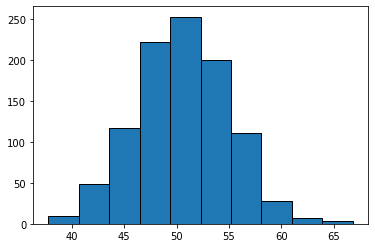

In [106]:
import matplotlib.pyplot as plt

plt.hist(eqms, edgecolor = 'black')
plt.show()

---

## **Modelo: K-Vizinhos Mais Próximos (K-NN)**

In [118]:
from sklearn.neighbors import KNeighborsRegressor

k = 1003

R = 100
eqms_treino = []
eqms_teste = []

X = dados[['bmi']]
y = dados['charges'] 

for i in range(R):
    Xtreino, Xteste, ytreino, yteste  = train_test_split(X, y, test_size = 0.25)

    knn = KNeighborsRegressor(n_neighbors = k)
    knn.fit(Xtreino, ytreino) 

    preditos_treino = knn.predict(Xtreino)
    eqm_treino = mean_squared_error(preditos_treino, ytreino)
    eqms_treino.append(eqm_treino)

    preditos_teste = knn.predict(Xteste)
    eqm_teste = mean_squared_error(preditos_teste, yteste)
    eqms_teste.append(eqm_teste)
 
print('O Erro Quadrático Médio de TREINO foi: {:.2f}'.format(np.mean(eqms_treino)))
print('O Erro Quadrático Médio de TESTE  foi:  {:.2f}'.format(np.mean(eqms_teste)))

O Erro Quadrático Médio de TREINO foi: 146.39
O Erro Quadrático Médio de TESTE  foi:  147.19


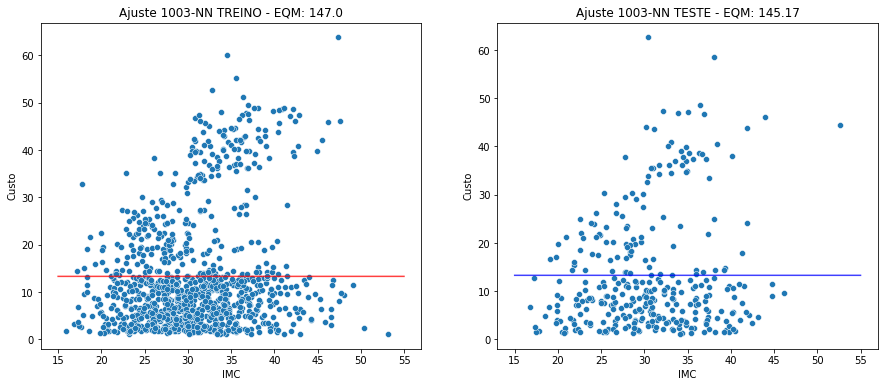

In [119]:
# Gráfico do KNN com 1 Variável 

import matplotlib.pyplot as plt
import seaborn as sns

X = dados[['bmi']]
y = dados['charges']

Xtreino, Xteste, ytreino, yteste  = train_test_split(X, y, test_size = 0.25)

knn = KNeighborsRegressor(n_neighbors = k)
knn.fit(Xtreino, ytreino)

preditos_treino = knn.predict(Xtreino)
preditos_teste = knn.predict(Xteste)

eqm_treino = mean_squared_error(preditos_treino, ytreino)
eqm_teste = mean_squared_error(preditos_teste, yteste) 

x = np.arange(15, 55, 0.01)
y = knn.predict(pd.DataFrame({'bmi': x}))

plt.figure(figsize = (15, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x = Xtreino['bmi'], y = ytreino)
plt.plot(x, y, color = 'red', alpha = 0.75)
plt.title('Ajuste {}-NN TREINO - EQM: '.format(k) + str(round(eqm_treino, 2)))
plt.xlabel('IMC')
plt.ylabel('Custo')  

plt.subplot(1, 2, 2)
sns.scatterplot(x = Xteste['bmi'], y = yteste)
plt.plot(x, y, color = 'blue', alpha = 0.75)
plt.title('Ajuste {}-NN TESTE - EQM: '.format(k) + str(round(eqm_teste, 2)))
plt.xlabel('IMC')
plt.ylabel('Custo') 
plt.show()

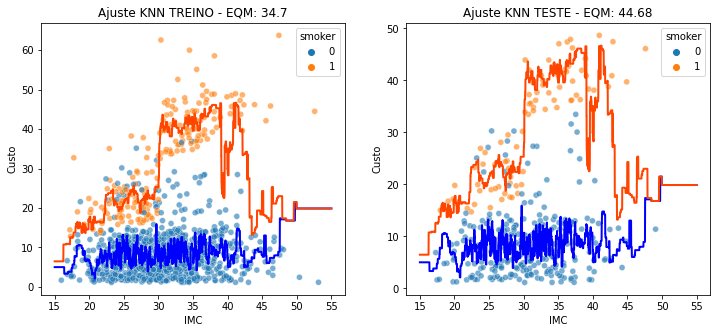

In [127]:
# Gráfico do Modelo com 2 Variáveis

X = dados[['bmi', 'smoker']]
y = dados['charges'] 

Xtreino, Xteste, ytreino, yteste  = train_test_split(X, y, test_size = 0.25)

k = 7

modelo = KNeighborsRegressor(n_neighbors = k)
modelo.fit(Xtreino, ytreino)

preditos_treino = modelo.predict(Xtreino)
preditos_teste = modelo.predict(Xteste)

eqm_treino = mean_squared_error(preditos_treino, ytreino)
eqm_teste = mean_squared_error(preditos_teste, yteste) 

import numpy as np
 
x = np.arange(15, 55, 0.01)
v0 = np.zeros(len(x))
v1 = np.ones(len(x))

c0 = pd.DataFrame([x, v0], index = ['bmi', 'smoker']).T
c1 = pd.DataFrame([x, v1], index = ['bmi', 'smoker']).T

d0 = modelo.predict(c0)
d1 = modelo.predict(c1)

plt.figure(figsize = (12, 5))

plt.subplot(1, 2, 1) 
sns.scatterplot(x = Xtreino['bmi'], y = ytreino, hue =  Xtreino['smoker'], alpha = 0.6)
plt.plot(x, d0, '-', color = 'blue', linewidth = 2)
plt.plot(x, d1, '-', color = 'orangered', linewidth = 2)
plt.title('Ajuste KNN TREINO - EQM: ' + str(round(eqm_treino, 2)))
plt.xlabel('IMC')
plt.ylabel('Custo')  

plt.subplot(1, 2, 2) 
sns.scatterplot(x = Xteste['bmi'], y = yteste, hue =  Xteste['smoker'], alpha = 0.6)
plt.plot(x, d0, '-', color = 'blue', linewidth = 2)
plt.plot(x, d1, '-', color = 'orangered', linewidth = 2) 
plt.title('Ajuste KNN TESTE - EQM: ' + str(round(eqm_teste, 2)))
plt.xlabel('IMC')
plt.ylabel('Custo') 

plt.show()

## **Árvores de Decisão**

In [155]:
from sklearn.tree import DecisionTreeRegressor

profundidade = 4

R = 100
eqms_treino = []
eqms_teste = []

X = dados[['bmi', 'smoker']]
y = dados['charges'] 

for i in range(R):
    Xtreino, Xteste, ytreino, yteste  = train_test_split(X, y, test_size = 0.25)

    arvore = DecisionTreeRegressor(max_depth = profundidade)
    arvore.fit(Xtreino, ytreino) 

    preditos_treino = arvore.predict(Xtreino)
    eqm_treino = mean_squared_error(preditos_treino, ytreino)
    eqms_treino.append(eqm_treino)

    preditos_teste = arvore.predict(Xteste)
    eqm_teste = mean_squared_error(preditos_teste, yteste)
    eqms_teste.append(eqm_teste)
 
print('O Erro Quadrático Médio de TREINO foi: {:.2f}'.format(np.mean(eqms_treino)))
print('O Erro Quadrático Médio de TESTE  foi:  {:.2f}'.format(np.mean(eqms_teste)))

O Erro Quadrático Médio de TREINO foi: 15.55
O Erro Quadrático Médio de TESTE  foi:  57.68


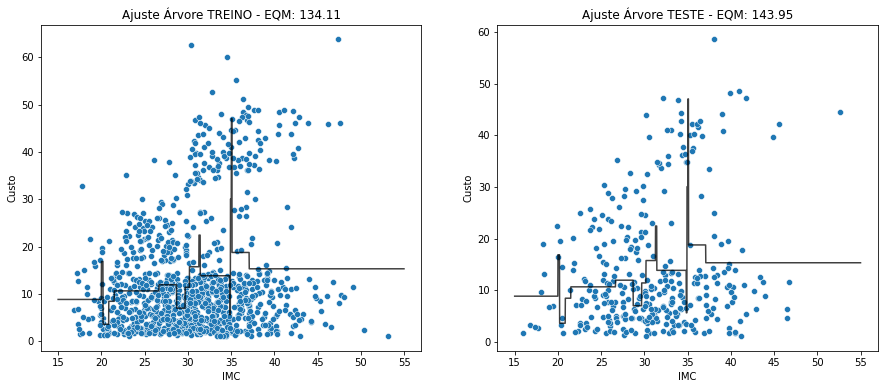

In [147]:
# Gráfico da Árvore com 1 Variável 

import matplotlib.pyplot as plt
import seaborn as sns

X = dados[['bmi']]
y = dados['charges']

Xtreino, Xteste, ytreino, yteste  = train_test_split(X, y, test_size = 0.25)

arvore = DecisionTreeRegressor(max_depth = profundidade)
arvore.fit(Xtreino, ytreino)

preditos_treino = arvore.predict(Xtreino)
preditos_teste = arvore.predict(Xteste)

eqm_treino = mean_squared_error(preditos_treino, ytreino)
eqm_teste = mean_squared_error(preditos_teste, yteste) 

import numpy as np

x = np.arange(15, 55, 0.01)
y = arvore.predict(pd.DataFrame({'bmi': x}))

plt.figure(figsize = (15, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x = Xtreino['bmi'], y = ytreino)
plt.plot(x, y, color = 'black', alpha = 0.75)
plt.title('Ajuste Árvore TREINO - EQM: '.format(k) + str(round(eqm_treino, 2)))
plt.xlabel('IMC')
plt.ylabel('Custo')  

plt.subplot(1, 2, 2)
sns.scatterplot(x = Xteste['bmi'], y = yteste)
plt.plot(x, y, color = 'black', alpha = 0.75)
plt.title('Ajuste Árvore TESTE - EQM: '.format(k) + str(round(eqm_teste, 2)))
plt.xlabel('IMC')
plt.ylabel('Custo') 
plt.show()

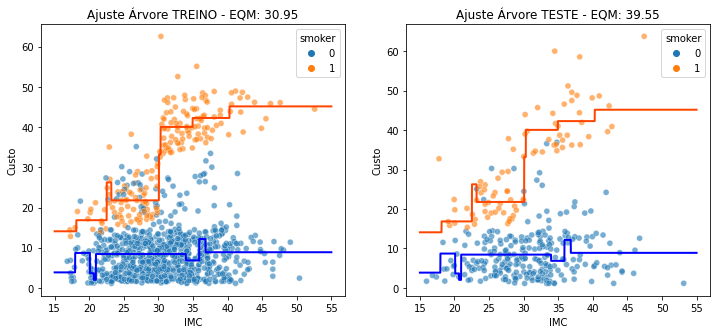

In [148]:
# Gráfico da Árvore com 2 Variáveis

X = dados[['bmi', 'smoker']]
y = dados['charges'] 

Xtreino, Xteste, ytreino, yteste  = train_test_split(X, y, test_size = 0.25)
 
arvore = DecisionTreeRegressor(max_depth = profundidade)
arvore.fit(Xtreino, ytreino)

preditos_treino = arvore.predict(Xtreino)
preditos_teste = arvore.predict(Xteste)

eqm_treino = mean_squared_error(preditos_treino, ytreino)
eqm_teste = mean_squared_error(preditos_teste, yteste) 

import numpy as np
 
x = np.arange(15, 55, 0.01)
v0 = np.zeros(len(x))
v1 = np.ones(len(x))

c0 = pd.DataFrame([x, v0], index = ['bmi', 'smoker']).T
c1 = pd.DataFrame([x, v1], index = ['bmi', 'smoker']).T

d0 = arvore.predict(c0)
d1 = arvore.predict(c1)

plt.figure(figsize = (12, 5))

plt.subplot(1, 2, 1) 
sns.scatterplot(x = Xtreino['bmi'], y = ytreino, hue =  Xtreino['smoker'], alpha = 0.6)
plt.plot(x, d0, '-', color = 'blue', linewidth = 2)
plt.plot(x, d1, '-', color = 'orangered', linewidth = 2)
plt.title('Ajuste Árvore TREINO - EQM: ' + str(round(eqm_treino, 2)))
plt.xlabel('IMC')
plt.ylabel('Custo')  

plt.subplot(1, 2, 2) 
sns.scatterplot(x = Xteste['bmi'], y = yteste, hue =  Xteste['smoker'], alpha = 0.6)
plt.plot(x, d0, '-', color = 'blue', linewidth = 2)
plt.plot(x, d1, '-', color = 'orangered', linewidth = 2) 
plt.title('Ajuste Árvore TESTE - EQM: ' + str(round(eqm_teste, 2)))
plt.xlabel('IMC')
plt.ylabel('Custo') 

plt.show()

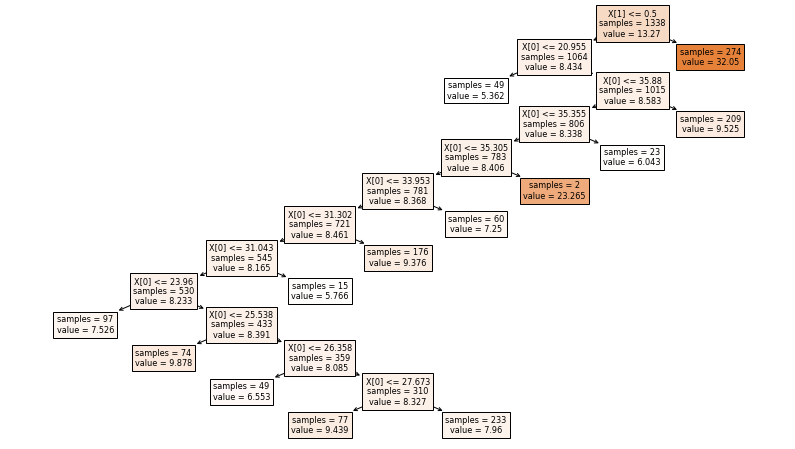

In [156]:
# Gráfico da Árvore

from sklearn.tree import plot_tree

X = dados[['bmi', 'smoker']]
y = dados['charges']

arvore = DecisionTreeRegressor(min_samples_split = 300)
arvore.fit(X, y)

plt.figure(figsize = (14, 8))
plot_tree(arvore, filled=True, proportion = False, impurity = False)
plt.show()

---

## **Comparação dos Modelos**

In [157]:
def HoldoutRepetido(modelo, replicas = 50, proporcao = 0.25): 

    eqms_treino = []
    eqms_teste = []

    for i in range(replicas):
        Xtreino , Xteste, ytreino, yteste  = train_test_split(X, y, test_size = proporcao)
        
        #Treinando o Modelo
        reg = modelo
        reg.fit(Xtreino, ytreino)

        #Verificando o eqm no teste
        preditos_treino = reg.predict(Xtreino) 
        eqm_treino = mean_squared_error(ytreino, preditos_treino)

        preditos_teste = reg.predict(Xteste)
        eqm_teste = mean_squared_error(yteste, preditos_teste)

        #Guardando o resultado
        eqms_treino.append(eqm_treino)
        eqms_teste.append(eqm_teste)
    
    res_treino = np.array(eqms_treino).mean().round(2)
    res_teste = np.array(eqms_teste).mean().round(2)

    print('EQM médio de TREINO: {}'.format(res_treino))
    print('EQM médio de TESTE: {}'.format(res_teste))

    return res_treino, res_teste 

In [158]:
HoldoutRepetido(modelo = LinearRegression())

EQM médio de TREINO: 49.89
EQM médio de TESTE: 51.02


(49.89, 51.02)

In [159]:
HoldoutRepetido(KNeighborsRegressor())

EQM médio de TREINO: 31.23
EQM médio de TESTE: 48.14


(31.23, 48.14)

In [160]:
HoldoutRepetido(DecisionTreeRegressor())

EQM médio de TREINO: 15.33
EQM médio de TESTE: 59.08


(15.33, 59.08)

In [163]:
X = dados[['bmi', 'smoker']]
y = dados['charges']

modelos = [LinearRegression(), 
           KNeighborsRegressor(n_neighbors = 5), 
           KNeighborsRegressor(n_neighbors = 15),
           KNeighborsRegressor(n_neighbors = 25),
           KNeighborsRegressor(n_neighbors = 35),
           KNeighborsRegressor(n_neighbors = 45),
           DecisionTreeRegressor(max_depth = 1),
           DecisionTreeRegressor(max_depth = 2),
           DecisionTreeRegressor(max_depth = 3),
           DecisionTreeRegressor(max_depth = 4),
           DecisionTreeRegressor(max_depth = 5)]

nomes = ['Regressão Linear',
         'KNN - K = 5', 
         'KNN - K = 15', 
         'KNN - K = 25', 
         'KNN - K = 35', 
         'KNN - K = 45',
         'Árvore - Prof = 1',
         'Árvore - Prof = 2',
         'Árvore - Prof = 3',
         'Árvore - Prof = 4',
         'Árvore - Prof = 5']

treinos = []
testes = []

for modelo in modelos:
    resultados = HoldoutRepetido(modelo)
    treinos.append(resultados[0])
    testes.append(resultados[1])

aux = {'EQM Treino': treinos, 'EQM Teste': testes}
resultados = pd.DataFrame(aux, index = nomes)
resultados.sort_values(by = 'EQM Teste')

EQM médio de TREINO: 50.09
EQM médio de TESTE: 50.38
EQM médio de TREINO: 31.06
EQM médio de TESTE: 48.0
EQM médio de TREINO: 44.34
EQM médio de TESTE: 50.46
EQM médio de TREINO: 54.08
EQM médio de TESTE: 60.19
EQM médio de TREINO: 68.07
EQM médio de TESTE: 70.49
EQM médio de TREINO: 80.53
EQM médio de TESTE: 82.34
EQM médio de TREINO: 55.5
EQM médio de TESTE: 56.54
EQM médio de TREINO: 34.51
EQM médio de TESTE: 34.17
EQM médio de TREINO: 32.77
EQM médio de TESTE: 35.83
EQM médio de TREINO: 31.93
EQM médio de TESTE: 36.71
EQM médio de TREINO: 30.89
EQM médio de TESTE: 37.43


,EQM Treino,EQM Teste
Árvore - Prof = 2,34.51,34.17
Árvore - Prof = 3,32.77,35.83
Árvore - Prof = 4,31.93,36.71
Árvore - Prof = 5,30.89,37.43
KNN - K = 5,31.06,48.00
Regressão Linear,50.09,50.38
KNN - K = 15,44.34,50.46
Árvore - Prof = 1,55.50,56.54
KNN - K = 25,54.08,60.19
KNN - K = 35,68.07,70.49


---

## **Exercício Proposto**

- Encontre valores ótimos para o K do KNN e a profundidade da Árvores.

- Replique os experimentos e verifique se os melhores modelos se mantém, quando utilizamos o Erro Absoluto Médio ao invés do Erro Quadrático Médio.

In [164]:
from sklearn.metrics import mean_absolute_error 

#mae = np.mean(abs(real - observado))

---

**_#itstimetoflai_** 